In [4]:
import pandas as pd
import numpy as np

df_titanic = pd.read_csv('../dataset/train.csv')
df_titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df_titanic.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [6]:
df_titanic['Age']=df_titanic['Age'].fillna(0)

In [7]:
sex = pd.get_dummies(df_titanic.Sex,prefix='Sex')
em = pd.get_dummies(df_titanic.Embarked,prefix="em")

frames=[df_titanic,sex,em]
df_titanic=pd.concat(frames,axis=1)

y=df_titanic.Survived.values
# y.reshape(-1,1)

X = df_titanic.drop(['PassengerId','Survived','Name','Ticket','Cabin','Sex','Embarked'],axis=1)
X.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,em_C,em_Q,em_S
0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,38.0,1,0,71.2833,1,0,1,0,0
2,3,26.0,0,0,7.9250,1,0,0,0,1
3,1,35.0,1,0,53.1000,1,0,0,0,1
4,3,35.0,0,0,8.0500,0,1,0,0,1


In [8]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)
print(X_train.shape,X_test.shape)

(712, 10) (179, 10)


In [9]:
from sklearn.preprocessing import StandardScaler
scalar=StandardScaler()
X_train=scalar.fit_transform(X_train)
X_test=scalar.transform(X_test)

In [13]:
X_train.shape

(712, 10)

In [10]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train,y_train)

print('逻辑回归测试准确率:{:.2f}%'.format(lr.score(X_test,y_test)*100))

逻辑回归测试准确率:81.56%


In [11]:
import keras
from keras.models import Sequential
from keras.layers import Dense

In [14]:
# 单隐层
ann = Sequential()
ann.add(Dense(units=11,input_dim=10,activation='relu'))
ann.add(Dense(units=22,activation='relu'))
ann.add(Dense(units=1,activation='sigmoid'))
ann.compile(optimizer='adam',loss='binary_crossentropy',metrics=['acc'])

In [15]:
history = ann.fit(X_train,y_train,epochs=30,batch_size=64,validation_data=(X_test,y_test))

Epoch 1/30
12/12 [==============================] - 0s 15ms/step - loss: 0.6797 - acc: 0.6011 - val_loss: 0.6362 - val_acc: 0.7207
Epoch 2/30
12/12 [==============================] - 0s 2ms/step - loss: 0.6464 - acc: 0.6756 - val_loss: 0.6004 - val_acc: 0.7821
Epoch 3/30
12/12 [==============================] - 0s 2ms/step - loss: 0.6171 - acc: 0.7177 - val_loss: 0.5675 - val_acc: 0.8101
Epoch 4/30
12/12 [==============================] - 0s 2ms/step - loss: 0.5904 - acc: 0.7303 - val_loss: 0.5397 - val_acc: 0.8156
Epoch 5/30
12/12 [==============================] - 0s 2ms/step - loss: 0.5663 - acc: 0.7388 - val_loss: 0.5128 - val_acc: 0.8156
Epoch 6/30
12/12 [==============================] - 0s 2ms/step - loss: 0.5452 - acc: 0.7416 - val_loss: 0.4887 - val_acc: 0.8101
Epoch 7/30
12/12 [==============================] - 0s 2ms/step - loss: 0.5260 - acc: 0.7584 - val_loss: 0.4707 - val_acc: 0.8045
Epoch 8/30
12/12 [==============================] - 0s 2ms/step - loss: 0.5114 - acc: 0.7

In [20]:
from sklearn.metrics import classification_report
# 使用分类报告
def show_classfication_report(ann,X_test,y_test):
    y_pred = ann.predict(X_test,batch_size=10)
    y_pred = np.round(y_pred)
    # y_test=y_test.values
    y_test=y_test.reshape(len(y_test),1)
    print(classification_report(y_test,y_pred,labels=[0,1]))

In [16]:
import matplotlib.pyplot as plt

def show_history(history):
    loss=history.history['loss']
    val_loss=history.history['val_loss']
    epochs=range(1,len(loss)+1)
    plt.figure(figsize=(12,4))
    plt.subplot(1,2,1)
    plt.plot(epochs,loss,'bo',label="训练集损失")
    plt.plot(epochs,val_loss,'b',label="验证集损失")
    plt.title('训练集和验证集损失')
    plt.xlabel('训练轮次')
    plt.ylabel('损失')
    plt.legend()
    acc=history.history['acc']
    val_acc=history.history['val_acc']
    plt.subplot(1,2,2)
    plt.plot(epochs,acc,'bo',label="训练集准确率")
    plt.plot(epochs,val_acc,'b',label="验证集准确率")
    plt.title('训练集和验证集准确率')
    plt.xlabel('训练轮次')
    plt.ylabel('准确率')
    plt.legend()

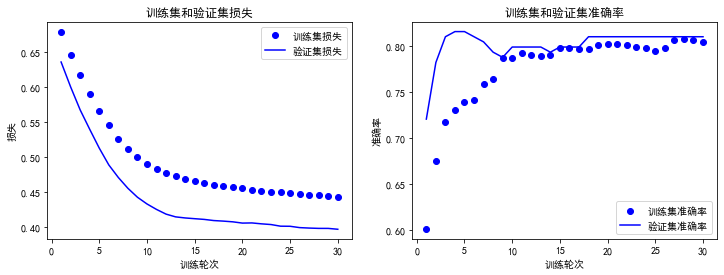

In [18]:
show_history(history)

In [21]:
show_classfication_report(ann,X_test,y_test)

              precision    recall  f1-score   support

           0       0.82      0.88      0.85       110
           1       0.79      0.70      0.74        69

    accuracy                           0.81       179
   macro avg       0.80      0.79      0.79       179
weighted avg       0.81      0.81      0.81       179



# 深度神经网络

In [22]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# 画出混淆矩阵
def show_confusion_matrix(ann,X_test,y_test):
    y_pred = ann.predict(X_test,batch_size=10)
    y_pred=np.round(y_pred)
    cm=confusion_matrix(y_test,y_pred)
    plt.title('混淆矩阵')
    sns.heatmap(cm,annot=True,cmap='Blues',fmt='d',cbar=False)

In [23]:
ann2= Sequential()
ann2.add(Dense(units=11,input_dim=10,activation='relu'))
ann2.add(Dense(units=22,activation='relu'))
ann2.add(Dense(units=44,activation='relu'))
ann2.add(Dense(units=88,activation='relu'))
ann2.add(Dense(units=176,activation='relu'))
ann2.add(Dense(units=1,activation='sigmoid'))

ann2.compile(optimizer='rmsprop',loss="binary_crossentropy",metrics=['acc'])
history2 = ann.fit(X_train,y_train,batch_size=64,epochs=30,validation_data=(X_test,y_test))

Epoch 1/30
12/12 [==============================] - 0s 5ms/step - loss: 0.4422 - acc: 0.8076 - val_loss: 0.3960 - val_acc: 0.8101
Epoch 2/30
12/12 [==============================] - 0s 2ms/step - loss: 0.4409 - acc: 0.8090 - val_loss: 0.3977 - val_acc: 0.8101
Epoch 3/30
12/12 [==============================] - 0s 2ms/step - loss: 0.4402 - acc: 0.8104 - val_loss: 0.3958 - val_acc: 0.8101
Epoch 4/30
12/12 [==============================] - 0s 2ms/step - loss: 0.4399 - acc: 0.8076 - val_loss: 0.3937 - val_acc: 0.8101
Epoch 5/30
12/12 [==============================] - 0s 2ms/step - loss: 0.4388 - acc: 0.8062 - val_loss: 0.3932 - val_acc: 0.8101
Epoch 6/30
12/12 [==============================] - 0s 2ms/step - loss: 0.4374 - acc: 0.8076 - val_loss: 0.3942 - val_acc: 0.8101
Epoch 7/30
12/12 [==============================] - 0s 2ms/step - loss: 0.4370 - acc: 0.8076 - val_loss: 0.3952 - val_acc: 0.8156
Epoch 8/30
12/12 [==============================] - 0s 2ms/step - loss: 0.4363 - acc: 0.80

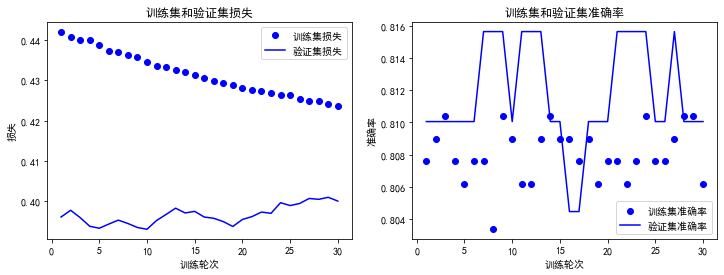

In [24]:
show_history(history2)

In [37]:
# 在神经网络中增加一些Dropout 层，并重新训练它
from keras.layers import Dropout
ann3= Sequential()
ann3.add(Dense(units=11,input_dim=10,activation='relu'))
ann3.add(Dense(units=22,activation='relu'))
ann3.add(Dropout(0.5))
ann3.add(Dense(units=44,activation='relu'))
ann3.add(Dropout(0.5))
ann3.add(Dense(units=88,activation='relu'))
ann3.add(Dropout(0.5))
ann3.add(Dense(units=1,activation='sigmoid'))
ann3.compile(optimizer='adam',loss="binary_crossentropy",metrics=['acc'])
history3=ann3.fit(X_test,y_test,batch_size=64,epochs=30,validation_data=(X_test,y_test))

Epoch 1/30
3/3 [==============================] - 0s 50ms/step - loss: 0.7538 - acc: 0.5531 - val_loss: 0.6701 - val_acc: 0.6145
Epoch 2/30
3/3 [==============================] - 0s 6ms/step - loss: 0.7515 - acc: 0.5475 - val_loss: 0.6599 - val_acc: 0.6480
Epoch 3/30
3/3 [==============================] - 0s 6ms/step - loss: 0.7396 - acc: 0.5587 - val_loss: 0.6496 - val_acc: 0.7821
Epoch 4/30
3/3 [==============================] - 0s 6ms/step - loss: 0.7150 - acc: 0.5978 - val_loss: 0.6416 - val_acc: 0.8045
Epoch 5/30
3/3 [==============================] - 0s 8ms/step - loss: 0.6890 - acc: 0.6034 - val_loss: 0.6341 - val_acc: 0.7989
Epoch 6/30
3/3 [==============================] - 0s 6ms/step - loss: 0.6866 - acc: 0.6313 - val_loss: 0.6277 - val_acc: 0.7989
Epoch 7/30
3/3 [==============================] - 0s 7ms/step - loss: 0.7216 - acc: 0.6034 - val_loss: 0.6213 - val_acc: 0.7989
Epoch 8/30
3/3 [==============================] - 0s 7ms/step - loss: 0.6592 - acc: 0.6089 - val_loss: 

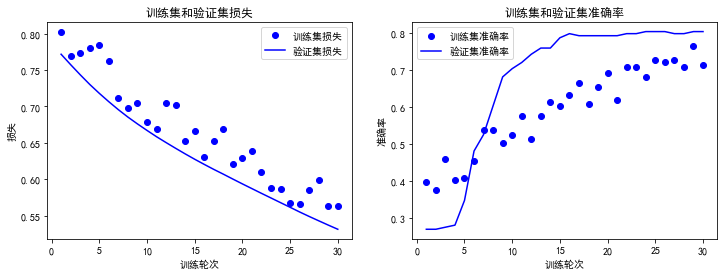

In [35]:
show_history(history3)